In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# define style for figures
sns.set_theme()
sns.set_style("white")
sns.set_context("notebook")
sns.set_palette("Paired")

In [2]:
# Read in training data
current_directory = os.getcwd()

# data to read in: SN, BN
data = []

# participants
participants = ('SN001', 'SN002', 'SN003', 'SN004', 'SN005', 'SN006', 'SN007', 'SN008', 'SN009', 'SN010', 'SN011', 'SN012', 'SN013', 'SN014', 'SN015')

SN=0
for p in participants:
    SN = SN+1
    root_subject = os.path.join('data', p)
    control_folders = [f.path for f in os.scandir(root_subject) if f.is_dir() and f.name.startswith('control')]
    BN = 0
    for b in control_folders:
        fb = []
        # uncommnent if you read in everything
        BN = BN+1
        if os.path.isfile(os.path.join(b, 'trials.csv')):
            data_temp = pd.read_csv(os.path.join(b, 'trials.csv'),)
            data_temp.insert(0,'BN', BN)
            data_temp.insert(0,'SN',SN)
            # data_row = [SN, BN, data_temp]
            # data.append(data_row)
            data.append(data_temp)            # pd.concat([data, data_row])
            # print(control_folders)

merged_df = pd.concat(data, ignore_index=True)  
# merged_df
# pd.set_option('display.max_rows', None)                     
# print(merged_df)


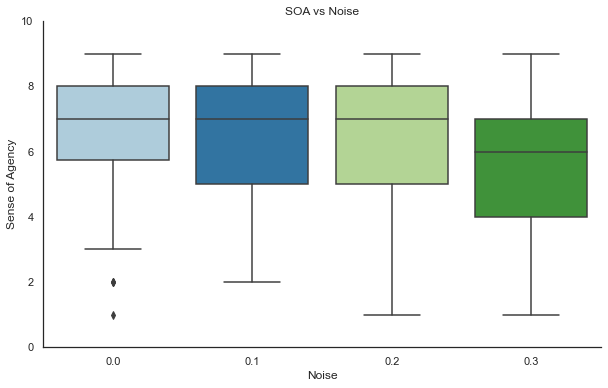

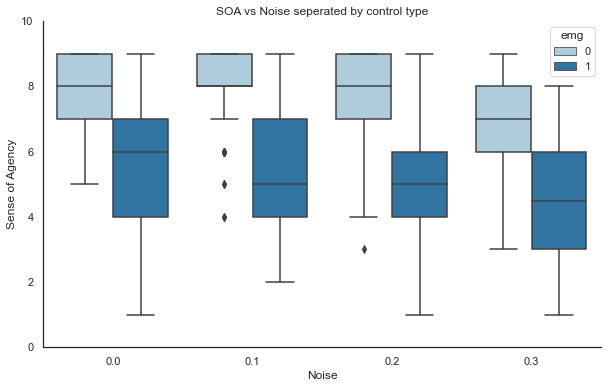

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x="noise", y="soa")
plt.title(f'SOA vs Noise')
plt.xlabel('Noise')
plt.ylabel('Sense of Agency')
plt.ylim((0,10))
sns.despine()

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x="noise", y="soa", hue="emg")
plt.title(f'SOA vs Noise seperated by control type')
plt.xlabel('Noise')
plt.ylabel('Sense of Agency')
plt.ylim((0,10))
sns.despine()

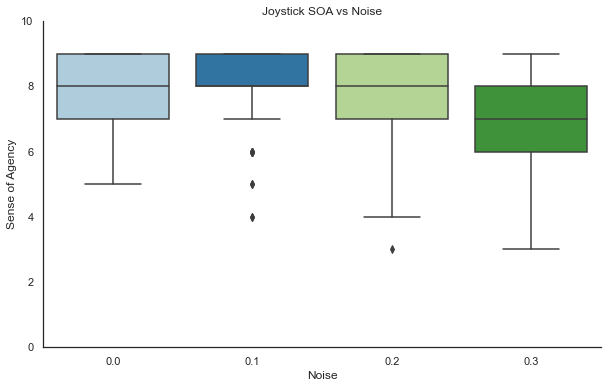

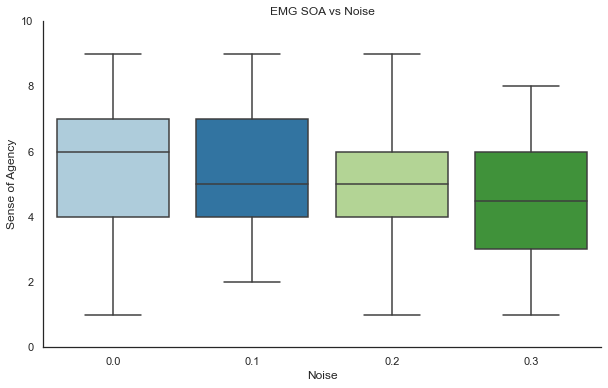

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df[merged_df["emg"]==0], x="noise", y="soa")
plt.title(f'Joystick SOA vs Noise')
plt.xlabel('Noise')
plt.ylabel('Sense of Agency')
plt.ylim((0,10))
sns.despine()

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df[merged_df["emg"]==1], x="noise", y="soa")
plt.title(f'EMG SOA vs Noise')
plt.xlabel('Noise')
plt.ylabel('Sense of Agency')
plt.ylim((0,10))
sns.despine()

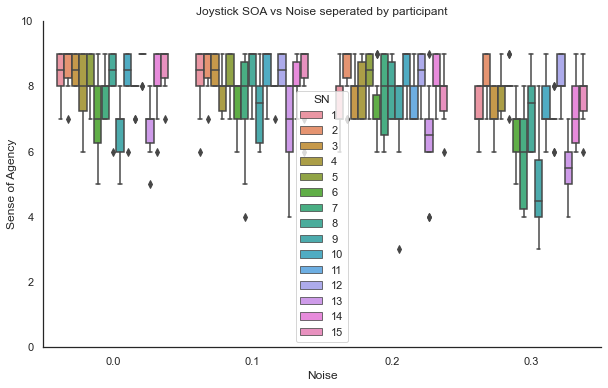

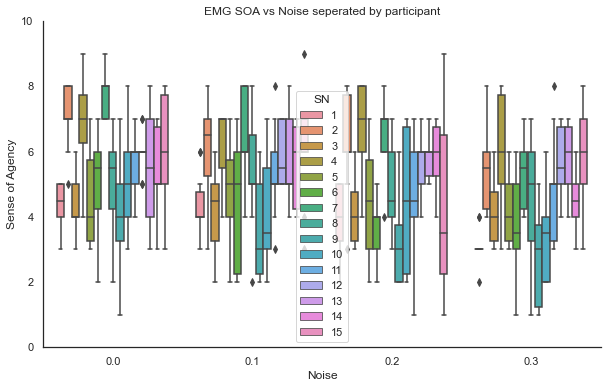

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df[merged_df["emg"]==0], x="noise", y="soa", hue="SN")
plt.title(f'Joystick SOA vs Noise seperated by participant')
plt.xlabel('Noise')
plt.ylabel('Sense of Agency')
plt.ylim((0,10))
sns.despine()


plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df[merged_df["emg"]==1], x="noise", y="soa", hue="SN")
plt.title(f'EMG SOA vs Noise seperated by participant')
plt.xlabel('Noise')
plt.ylabel('Sense of Agency')
plt.ylim((0,10))
sns.despine()

c:\Users\Sarah\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


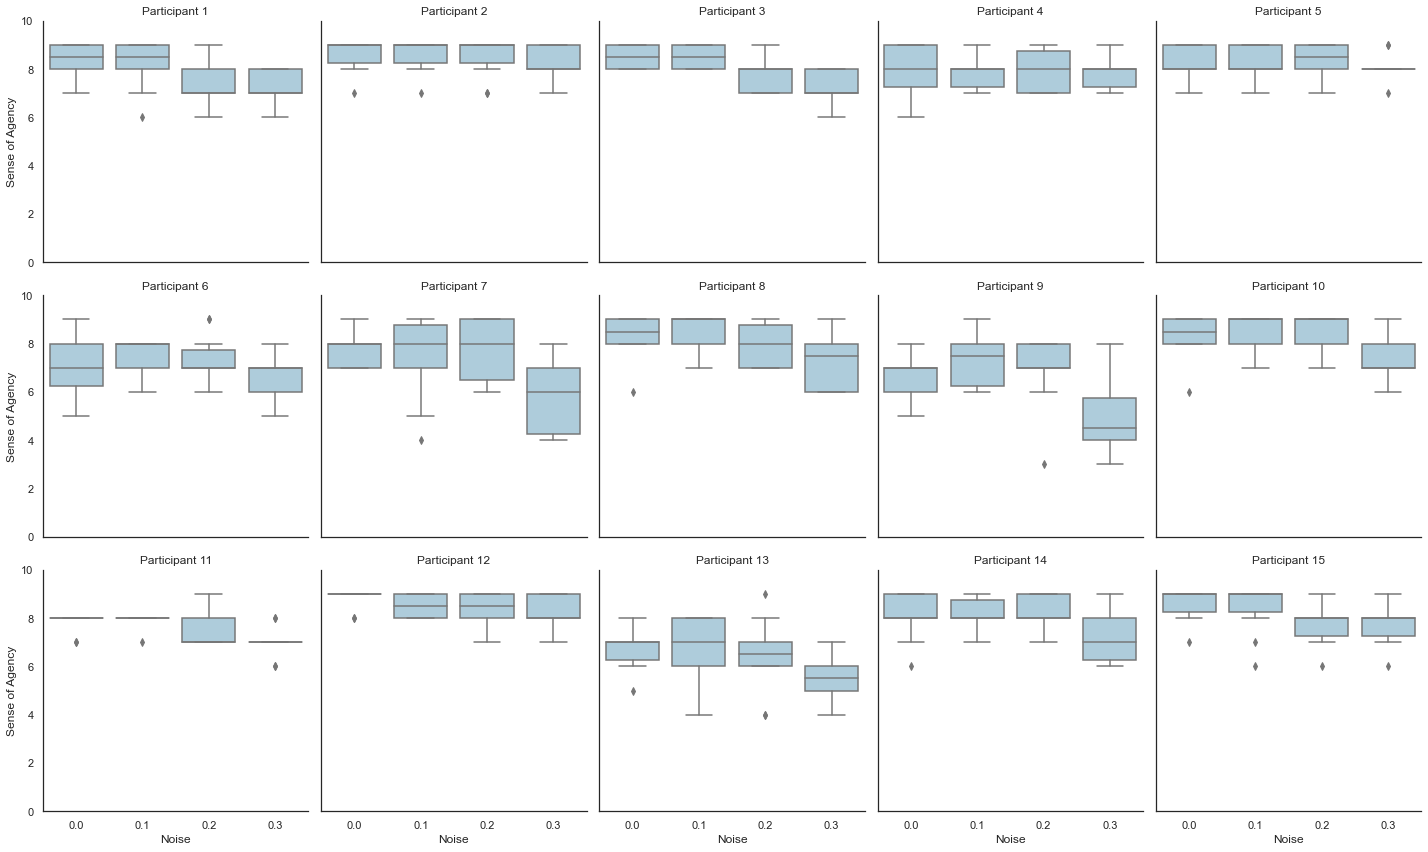

In [6]:
stickplot = sns.FacetGrid(merged_df[merged_df["emg"]==0], col="SN", col_wrap=5, height=4)
stickplot.map(sns.boxplot, "noise", "soa")

stickplot.set_titles("Participant {col_name}")
stickplot.set_axis_labels("Noise", "Sense of Agency")
stickplot.set(ylim=(0, 10))
plt.tight_layout()


c:\Users\Sarah\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


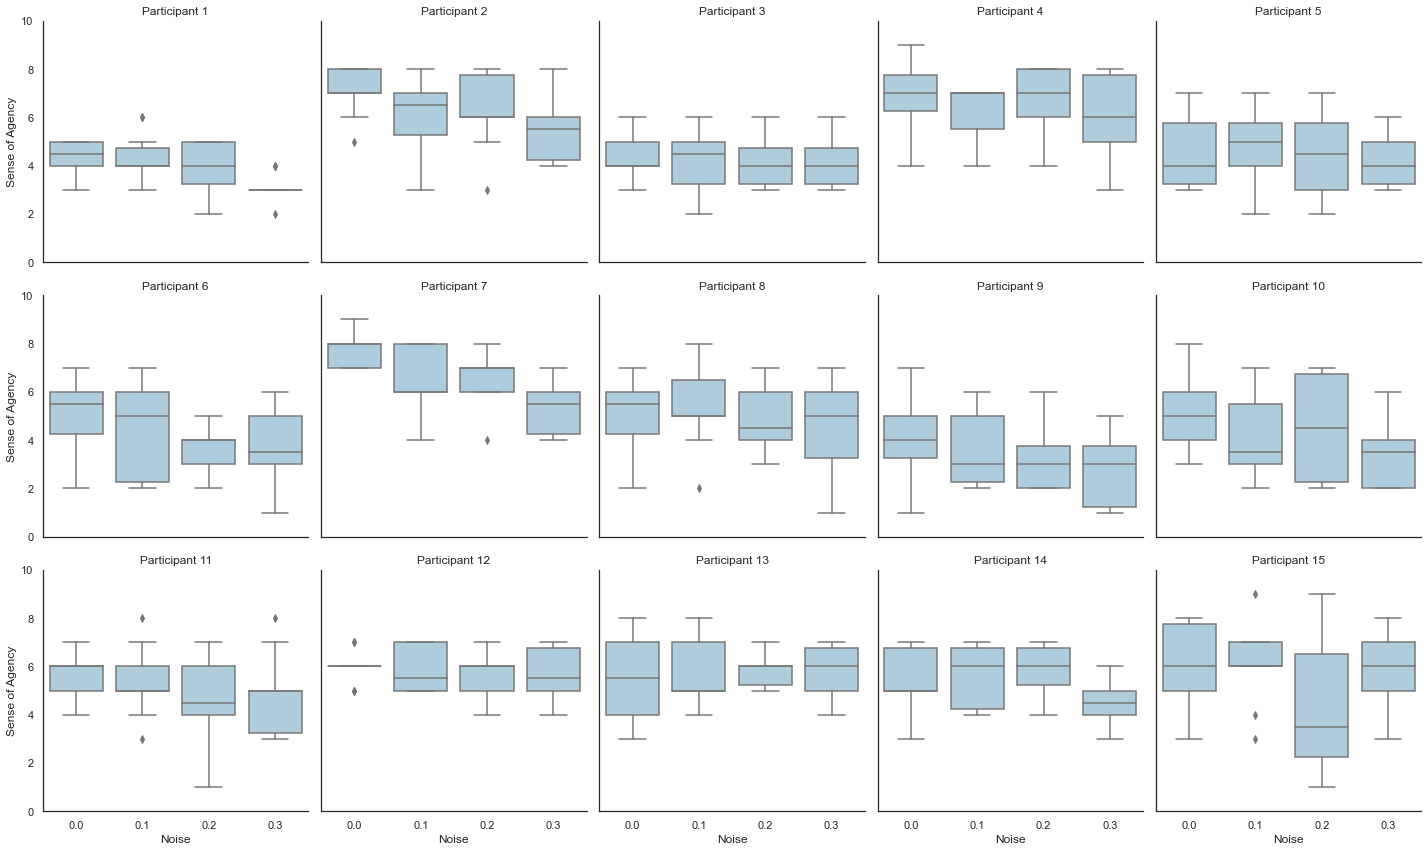

In [7]:
emgplot = sns.FacetGrid(merged_df[merged_df["emg"]==1], col="SN", col_wrap=5, height=4)
emgplot.map(sns.boxplot, "noise", "soa")

emgplot.set_titles("Participant {col_name}")
emgplot.set_axis_labels("Noise", "Sense of Agency")
emgplot.set(ylim=(0, 10))
plt.tight_layout()

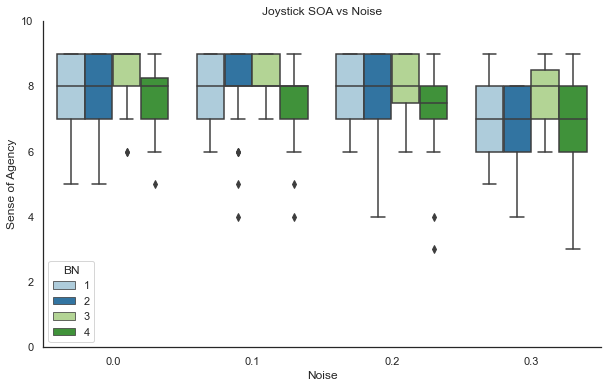

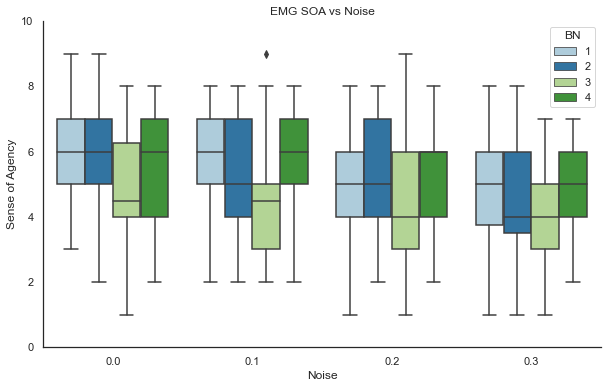

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df[merged_df["emg"]==0], x="noise", y="soa", hue="BN")
plt.title(f'Joystick SOA vs Noise')
plt.xlabel('Noise')
plt.ylabel('Sense of Agency')
plt.ylim((0,10))
sns.despine()

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df[merged_df["emg"]==1], x="noise", y="soa", hue="BN")
plt.title(f'EMG SOA vs Noise')
plt.xlabel('Noise')
plt.ylabel('Sense of Agency')
plt.ylim((0,10))
sns.despine()

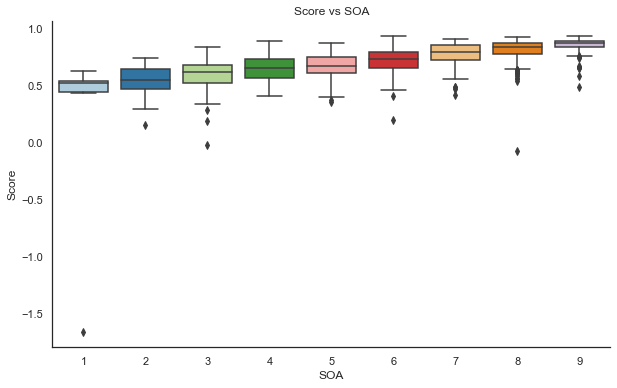

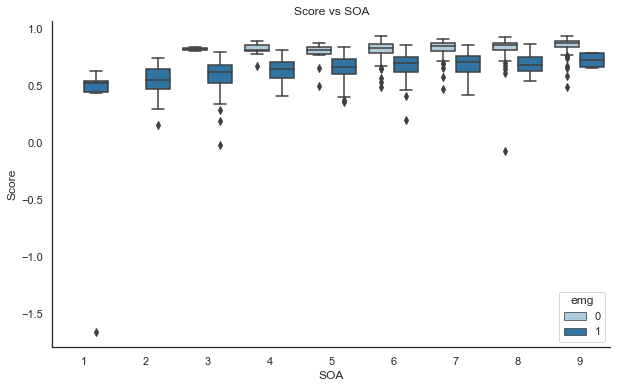

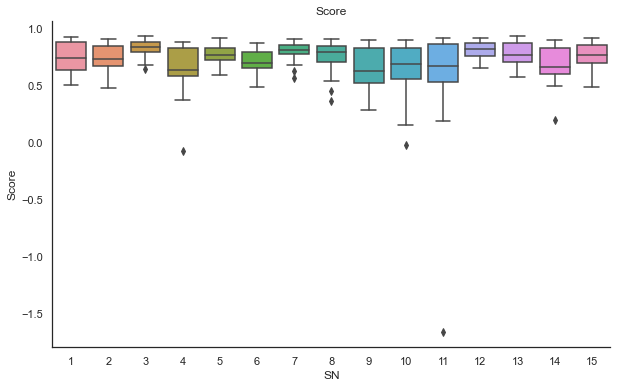

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x="soa", y="score")
plt.title(f'Score vs SOA')
plt.ylabel('Score')
plt.xlabel('SOA')
sns.despine()


plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x="soa", y="score", hue="emg")
plt.title(f'Score vs SOA')
plt.ylabel('Score')
plt.xlabel('SOA')
sns.despine()

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x="SN", y="score")
plt.title(f'Score')
# plt.ylim(0, 1)
plt.ylabel('Score')
plt.xlabel('SN')
sns.despine()
